In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/mike-ds30/quiz/main/mark.csv')
data.head(1000)

,test1,test2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [ ]:
X = data.drop('admitted', axis = 1)
y = data['admitted']
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns, index = X.index)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 30)

In [ ]:
class LogisticRegression:
  def __init__(self, feature_cnt):
    self.bias = 0
    self.theta = np.zeros(feature_cnt)
  
  def sigmoid(self, y):
    return 1 / (1 + np.exp(-1 * y))

  def threshold(self, y):
    return [1 if i >= 0.5 else 0 for i in y]

  def predict(self, X):
    y_pred_raw = self.sigmoid(np.array(self.bias + np.dot(X, self.theta)))
    return y_pred_raw, self.threshold(y_pred_raw)

  def update(self, X, y, y_pred, alpha):
    self.bias = self.bias - (alpha * ((1 / len(y)) * (np.sum(y_pred - y))))
    self.theta = self.theta - (alpha * ((1 / len(y)) * (np.dot((y_pred - y), X))))

  def fit(self, X, y, iter, alpha):
    loss = []
    for i in range(iter):
      y_pred_raw, y_pred = self.predict(X)
      self.update(X, y, y_pred_raw, alpha)
      loss.append(log_loss(y, y_pred_raw))
    return loss

<function matplotlib.pyplot.show>

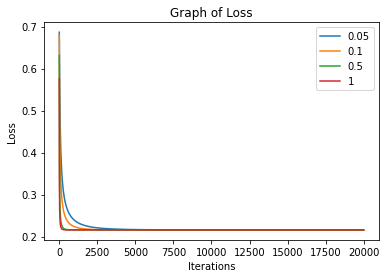

In [ ]:
losses = []
for alpha in [0.05, 0.1, 0.5, 1]:
  model = LogisticRegression(X_train.shape[1])
  loss = model.fit(X_train, y_train, 20000, alpha)
  losses.append([alpha, loss])
for i in range(len(losses)):
  plt.plot(np.arange(1, 20000), losses[i][1][1:], label = losses[i][0])
plt.title("Graph of Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show

In [ ]:
model = LogisticRegression(X_train.shape[1])
loss = model.fit(X_train, y_train, 20000, 1)

In [ ]:
print("Bias:")
print(model.bias)
print("Theta:")
print(model.theta)

Bias:
1.8844862886119738
Theta:
[4.25136022 3.58049631]


In [ ]:
y_pred_raw, y_pred = model.predict(X_test)
res = pd.DataFrame({'Predicted': y_pred, 'Raw Predicted': y_pred_raw, 'Ground Truth': y_test})
res.head(100)

,Predicted,Raw Predicted,Ground Truth
20,0,0.094121,0
91,1,0.999989,1
34,0,0.060830,0
52,1,0.949380,1
8,1,0.999748,1
74,1,0.905223,1
21,1,0.999159,1
88,1,0.999976,1
80,1,0.999542,1
89,0,0.109967,0


In [ ]:
print("Cross Entropy Cost Function:")
print(log_loss(y_test, y_pred_raw))

Cross Entropy Cost Function:
0.18437213287899545


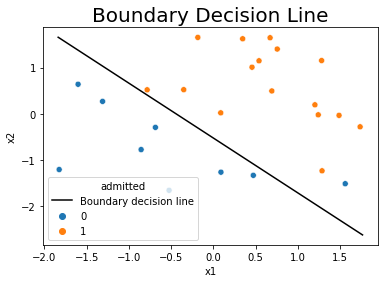

In [ ]:
boundary = (-1 * model.bias / model.theta[1]) + ((-1 * model.theta[0] /model.theta[1]) * X_train.iloc[:, 0])
sns.lineplot(x = X_train.iloc[:, 0], y = boundary, label='Boundary decision line', color='black')
sns.scatterplot(x = X_test.iloc[:, 0], y = X_test.iloc[:, 1], hue=y_test)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Boundary Decision Line", fontsize=20)
plt.show()

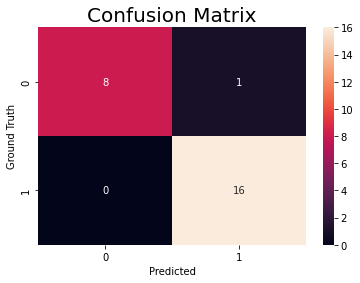

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.xlabel("Predicted")
plt.ylabel("Ground Truth")
plt.title("Confusion Matrix", fontsize=20)
plt.show()